### Preparing the R environment

Install the required packages to be used inside the project.

In [1]:
########################################################
###### Suppressing warnings for a cleaner output #######
########################################################
options(warn=-1)

########################################################
#### Installing and importing the required packages ####
########################################################
library(lubridate)                 # library to help work with dates
install.packages("scales")         # Scale Functions for Visualization
library(scales)

install.packages("tidyverse")      # Collection of packages to model, transform, and visualize data
library(tidyverse)                 # for declaratively creating graphics
library(dplyr)

library(ggpubr)

# install.packages("cowplot")
# library(cowplot)                   # Arrange 2 plots side-by-side https://stackoverflow.com/a/31223588/9332260


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\thatonedroid\AppData\Local\Temp\RtmpAP2wDD\downloaded_packages
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\thatonedroid\AppData\Local\Temp\RtmpAP2wDD\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x readr::col_factor()      masks scales::col_factor()
x lubridate::date()        masks base::date()
x purrr::discard()         masks scales::discard()
x dplyr::filter()          masks stats::filter()
x lubridate::intersect()   masks base::intersect()
x dplyr::lag()             masks stats::lag()
x lubridate::setdiff()     masks base::setdiff()
x lubridate::union()       masks base::union()


# Exploratory Data Analysis: COVID-19

In this Jupyter notebook, we perform a self expertimentation of Exploratory Data Analysis (EDA) for Denmark's COVID-19 cases in R. R is a language and environment for statistical computing and graphics (**cite: https://www.r-project.org/about.html**) which is perfect in this project as the goal is to visualize data and tell a conclusion/story based on real decisions.

## 1. Identify business problem

The first step to Exploratory Data Analysis (EDA) is to identify the business problem. The business case revolves around the understanding of the situation and the use of data to prevent spread of COVID-19 virus in Denmark. The aim is to analyze the data and compare against the decisions made and enforced by the officials and the health experts, primarily the two lockdowns from March and Decemberof 2020. This EDA is not a solution to the problem but the ambition is to understand if gathering factual data aided in effective decision making by the authorities. 

## 2. Data collection

The data used in this analysis is collected from Statistibanken, which is a public database maintained and made available by Danmarks Statistik --- the central statistics office in Denmark under the Ministry of Economy. The data consists of official records of total people tested, infections, deaths and admission to hospital to among other key figures. The data was collected starting from March 21, 2020, which gets updated frequently. The latest data as of conducting the experiment is up until December 15, 2020.

## 3. Data preparation

The data from Statistikbanken is made available in multiple formats so people can choose how they want the data, for example: an Excel sheet or a plain text file. For this analaysis, we chose to use the data as a CSV (comma-separated value) file for ease of use. In the following steps, we will go through the process of loading the data, tidying it and preparing it for the analysis.

### 3.1 Load the data into R and inspect

In the following steps, we load the raw data into this R notebook and inspect if it is workable and understandable. If not, we must proceed to transform the data. Without a clear understanding of data, the anaylsis will be out of scope.

After we load the data into the R notebook, we examine to ensure the target data and/or key figures exists. 

In [4]:
list.files(".")

[1] "covid-data-modified.csv"        "covid-data-statistikbanken.csv"
[3] "EDA-COVID-Copy1.ipynb"          "EDA-COVID.ipynb"               
[5] "README.md"

In [2]:
# Create a dataframe by reading the file containing the dataset

denmark_covid_data <- read.csv("covid-data-statistikbanken.csv", encoding="UTF-8")

### 3.2 Initial inspection and feedback

Now that the target data is loaded and ready to be used, we inspect and conclude which transformations are needed. To do so, we print the first few rows of the data.

In [3]:
head(denmark_covid_data)

X.,M03D21,M03D22,M03D23,M03D24,M03D25,M03D26,M03D27,M03D28,M03D29,...,M12D06,M12D07,M12D08,M12D09,M12D10,M12D11,M12D12,M12D13,M12D14,M12D15
Confirmed cases of COVID-19 (total),1326,1395,1450,1577,1715,1851,2010,2201,2395,...,90603,92649,94799,97357,100489,103564,107116,109758,113095,116087
Recovered from COVID-19 infection (total,..,..,..,..,..,..,..,..,..,...,70876,71882,73052,74367,75664,76927,78236,79394,80564,82099
Number of persons tested for COVID-19 (total),11657,12351,12843,13756,14870,15981,17275,18810,20198,...,3524861,3541148,3556264,3572954,3592677,3611456,3630815,3646152,3664247,3680607
Deaths with COVID-19 (total),22,25,31,37,43,55,67,76,84,...,899,905,912,922,928,935,943,954,961,961
Deaths with COVID-19 per day,3,3,6,6,6,12,12,9,8,...,8,6,7,10,6,7,8,11,7,0
Persons hospitalised in connection with COVID-19,206,232,254,301,350,386,430,459,499,...,302,328,354,349,342,361,371,390,429,439


In the initial inspection, the data looks to be well prepared and organized but still not ready to be used. Based on the requirements and researchers, the transformations required is subjective. For our use case, the required transformations are listed below:

- The key indicators, i.e the names describing the values, are the first cell in every row. It needs to be transposed (rotated) such that the key indicators are the first cell of every columns. In simple terms, the x-axis and y-axis needs to be reversed. 
- The timeline is denoted by the format `MxxDxx`. For flexibility and general understanding, the date needs to be transformed into the international ISO format `yyyy-mm-dd`.
- The missing values are represented by `..`. Those should updated to either empty values or `NA` so that R can interpret it as missing value.
- Some interesting key indicators are missing, such as the daily confirmed cases. To rectify this situation, we can simply subtract the total number of cases of a certain day minus the day before, throughout the timeline.
- Finally, to adhere to R's naming covention, we rename each of the key indicators to follow snake case using "_", for example `some_key_indicator`.

All of the above steps to transform the data was done in Google Sheets (Microsoft Excel alternative) with the power of mathematical functions called formulas.

## write some shit to explain we didn't have to collect data manually and thank statistikbanken.

In [7]:
list.files('.')

[1] "covid-data-modified.csv"        "covid-data-statistikbanken.csv"
[3] "EDA-COVID-Copy1.ipynb"          "EDA-COVID.ipynb"               
[5] "README.md"

In [8]:
denmark_covid_data <- read.csv("covid-data-modified.csv", encoding="UTF-8")

In [9]:
tail(denmark_covid_data)

,X,modified_date,date,total_cases,total_recovered,total_tested,total_deaths,daily_deaths,daily_hospitalized,daily_patients_icu,daily_patients_ventilators,daily_cases
265,M12D10,2020-12D10,2020-12-10,100489,75664,3592677,928,6,342,40,28,3132
266,M12D11,2020-12D11,2020-12-11,103564,76927,3611456,935,7,361,48,27,3075
267,M12D12,2020-12D12,2020-12-12,107116,78236,3630815,943,8,371,54,31,3552
268,M12D13,2020-12D13,2020-12-13,109758,79394,3646152,954,11,390,58,33,2642
269,M12D14,2020-12D14,2020-12-14,113095,80564,3664247,961,7,429,61,34,3337
270,M12D15,2020-12D15,2020-12-15,116087,82099,3680607,961,0,439,68,39,2992


# Make note about the importance of verifying data

# Refactor 

### 3.3 Verify and update data types

The next step is to check the data types of the data loaded onto R. Since we read the data from a CSV file, R does not know what type of data certain inputs are. By default, it categorises unknown or mixed data types as `Factor` as they can store both strings and integers.

For example, the column (or variable) `date` should be of type `Date` but R understands it as of data type `Factor`. While this is fine and we can absolutely work with it, changing it to type of `Date` allows us to be more flexible and only show the month with the month's name, rather then the original value, such as `2020-04-20`.

In [10]:
str(denmark_covid_data)

'data.frame':	270 obs. of  12 variables:
 $ X                         : Factor w/ 270 levels "M03D21","M03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ modified_date             : Factor w/ 270 levels "2020-03D21","2020-03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ date                      : Factor w/ 270 levels "2020-03-21","2020-03-22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total_cases               : int  1326 1395 1450 1577 1715 1851 2010 2201 2395 2555 ...
 $ total_recovered           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ total_tested              : int  11657 12351 12843 13756 14870 15981 17275 18810 20198 21378 ...
 $ total_deaths              : int  22 25 31 37 43 55 67 76 84 95 ...
 $ daily_deaths              : int  3 3 6 6 6 12 12 9 8 11 ...
 $ daily_hospitalized        : int  206 232 254 301 350 386 430 459 499 533 ...
 $ daily_patients_icu        : int  42 46 55 59 87 94 109 121 131 137 ...
 $ daily_patients_ventilators: int  35 40 47 58 76 78 89 104 113 119 ...
 $ daily_cases            

In [11]:
denmark_covid_data$date <- ymd(denmark_covid_data$date)

## 4. Analyze the data

Now that we have changed the data types of the input data, we can start analyzing the data and gain understanding from it. To plot the data, we use the library `tidyverse` because of its flexibility and customization abilities.

In [12]:
# Define theme configs

single_plot_theme_config <- theme_light() +
theme(
    aspect.ratio=1,                                                        # Fixing aspect ratio
    plot.title = element_text(hjust = 0.5),                                # Center the title
    )


multiple_grid_plot_theme_config <- theme_light() +
theme(
    plot.title = element_text(hjust = 0.5, size = 10, face="bold"),      # Center the title, adjust font size and font face
    aspect.ratio = 1,                                                    # Fix aspect ratio
    legend.position=c(0.35, 0.95),                                       # Append the legend inside the plot
    plot.margin=unit(c(0,0,0,0.5),"cm"),                                 # Increase left margin so there's space between A & B
    axis.title = element_text(size = rel(0.8), face="bold")              # Adjust the size of x & y axis title
)


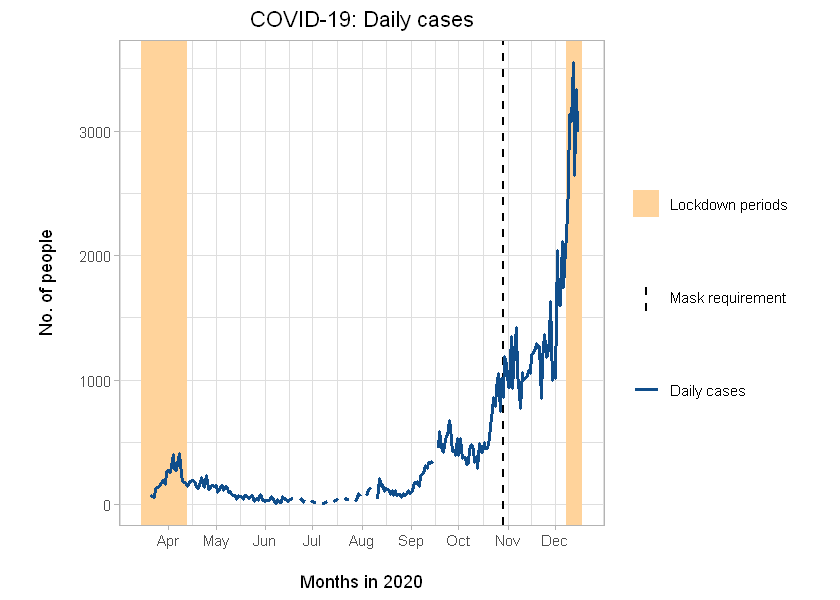

In [51]:
# Daily cases
options(repr.plot.width=7, repr.plot.height=5)

ggplot(denmark_covid_data, aes(x = date)) +

geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-18"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +


geom_line(aes(y = daily_cases, color = "dodgerblue4"), lwd = 1) +
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people\n") +                                    # Label for y-axis

ggtitle("COVID-19: Daily cases") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("dodgerblue4"),
                     labels = c("Daily cases"),
                     guide = "legend") +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) + 
single_plot_theme_config

### 4.1 Deaths, hospitalized and lockdowns

Starting with one of the most impactful plotting, we analyze the data for the number of deaths and hospitalized. Along with that, we also emphasize on the 2 lockdowns enforced by the state officials, the first one from March 15, 2020 to April 13, 2020 and the recent one starting from December 9, 2020 onwards.

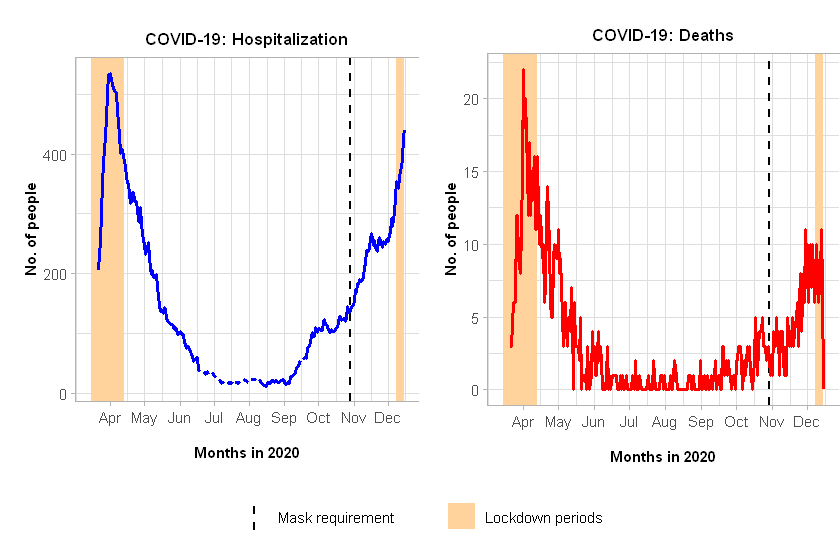

In [52]:
options(repr.plot.width=7, repr.plot.height=4.5)

hospitalized_plot <- ggplot(denmark_covid_data, aes(x = date)) +                                # Specify the data frame and x-axis for the plot
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +

geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +

geom_line(aes(y = daily_hospitalized, color = "blue"), lwd = 1) +               # line plot for hospitalized

scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people") +                                    # Label for y-axis

ggtitle("COVID-19: Hospitalization") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("blue", "red"),
                     labels = c("Hospitalized", "Deaths"),
                     ) +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) + 
multiple_grid_plot_theme_config
# theme(legend.position = c(1, 1), legend.justification = c(1, 1))

deaths_plot <- ggplot(denmark_covid_data, aes(x = date)) +                                # Specify the data frame and x-axis for the plot
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #1
    xmin = as.Date("2020-03-15"),
    xmax = as.Date("2020-04-13"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +
geom_rect(aes(                                                             # Rectangular shade for emphasizing on lockdown #2
    xmin = as.Date("2020-12-08"),
    xmax = as.Date("2020-12-15"),
    ymin = -Inf, ymax = Inf, fill = "Lockdown period")) +

geom_vline(aes(                                                            # Vertical dashed line
    xintercept = as.Date("2020-10-29"),
    linetype = "Break"),
           color = "black",
           lwd = 0.7
          ) +

geom_line(aes(y = daily_deaths, color = "red"), lwd = 1) +                 # Line plot for deaths
# geom_line(aes(y = daily_hospitalized, color = "blue"), lwd = 1) +               # line plot for hospitalized

scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +       # Improving the x-axis to show all months

xlab("\nMonths in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people") +                                    # Label for y-axis

ggtitle("COVID-19: Deaths") +                          # Title for the plot
scale_fill_manual(name = "",                                               # Legend for the rectangular shade
                  values="burlywood1",
                  labels=c("Lockdown periods")) +
scale_color_identity(name = "",                                            # Legend for the line plots
                     breaks = c("red"),
                     labels = c("Deaths")
                     ) +
scale_linetype_manual(name = "",                                           # Legend for the vertical dotted line
                      values = c("Break" = "dashed"),
                      labels = c("Mask requirement")) + 
multiple_grid_plot_theme_config

ggarrange(hospitalized_plot, deaths_plot, ncol=2, common.legend = TRUE, legend="bottom") 


After the initial plotting, it is clear that there was a strong impact of COVID-19 around late March--early April. The number of people who were dying due to COVID-19, as indicated by red line, and who were hospitalized, as indicated by the blue line, increased sharply. The first, month-long lockdown was imposed during this period, as indicated by the soft-orange shade. The result of the lockdown was effective as the number of reported hospitalization started to decline and kept declining over the next few months. The number of deaths was still rising at the end of the first lockdown, but started to stabilize soon after.

This was a positive indication that the imposed lockdown was effective in controlling the spread of the virus.

As the restictions started to loosen up, the public started to gather in larger numbers, which was an opportunity for the virus to spread again. This is indicated by the rise on both total deaths and hospitalized starting September. To control the rapid increase, the government mandated the use of mask on all public places starting October 29, represented by the black, dashed line.

Ever since, the numbers started to grow. The plot above shows a sharp incline starting November. And with the holidays starting, the government imposed second lockdown starting December 09, 2020, which is the date of conducting this experiment. This was an attempt to reduce the number of gatherings and parties, and limit them to families to control the spread of the COVID-19.

### 4.2 Total confirmed cased and total tested

While the first plot was impactful, a more meaningful one would be to analyze the data between total number of people tested (plot A) and total number of confirmed cases (plot B). When visualising them individually, both of the plots A and B shows almost linear growth as the months go by. Without much context, this is very worrying and can be taken out of proportion. By when combining them and visualizing them on the same plot (plot C), it becomes much clearer that the situation is not as bad. Yes, the number of cases are increasing, but when comparing them to the number of tests done, the result has a vastly different conclusion.

This is an example for understanding the importance of scope and context while conducting an analysis.

In [53]:
str(denmark_covid_data)

'data.frame':	270 obs. of  12 variables:
 $ X                         : Factor w/ 270 levels "M03D21","M03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ modified_date             : Factor w/ 270 levels "2020-03D21","2020-03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ date                      : Date, format: "2020-03-21" "2020-03-22" ...
 $ total_cases               : int  1326 1395 1450 1577 1715 1851 2010 2201 2395 2555 ...
 $ total_recovered           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ total_tested              : int  11657 12351 12843 13756 14870 15981 17275 18810 20198 21378 ...
 $ total_deaths              : int  22 25 31 37 43 55 67 76 84 95 ...
 $ daily_deaths              : int  3 3 6 6 6 12 12 9 8 11 ...
 $ daily_hospitalized        : int  206 232 254 301 350 386 430 459 499 533 ...
 $ daily_patients_icu        : int  42 46 55 59 87 94 109 121 131 137 ...
 $ daily_patients_ventilators: int  35 40 47 58 76 78 89 104 113 119 ...
 $ daily_cases               : int  71 69 55 127 138 136 1

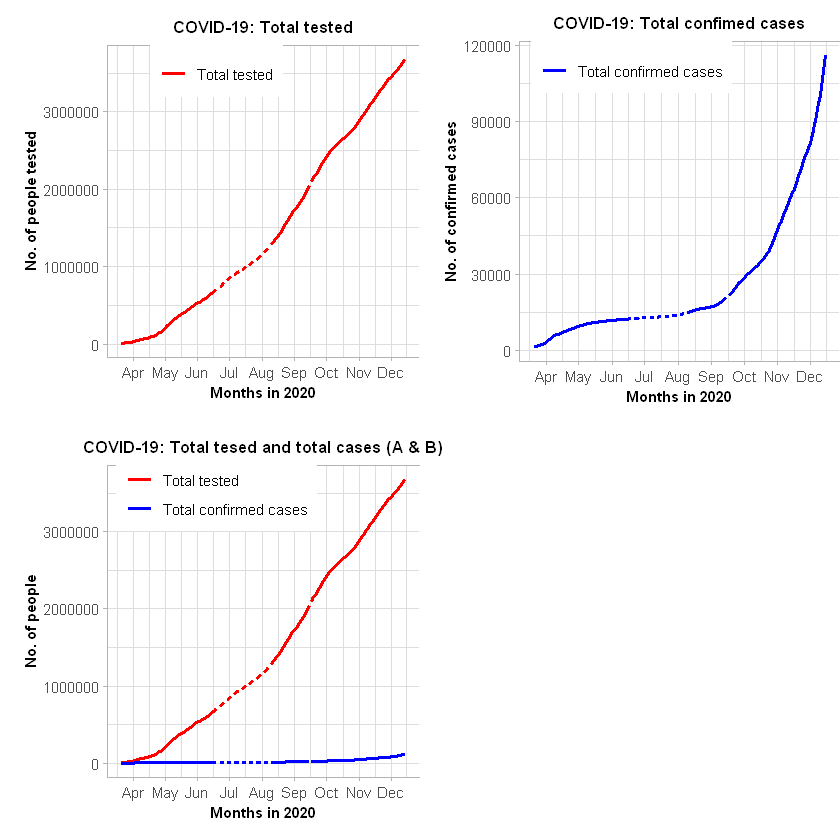

In [63]:
##########################################################################################################################
############ Step 1: First we create a plot "A" for total number of people tested and assign it to a variable ############
##########################################################################################################################

total_tested_plot <- ggplot(denmark_covid_data, aes(x = date)) +        # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tested, color = "red"), lwd = 1) +               # Line plot for total number of peple tested
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +    # Improving the x-axis to show all months
xlab("Months in 2020") +                                                # Label for x-axis
scale_y_continuous("No. of people tested",                              # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)   # Change from exponentials to human readable numbers
                   ) +
ggtitle("COVID-19: Total tested") +                                     # Title for the plot A
scale_color_identity(name = "",                                         # Legend for the line plot
                     breaks = "red",
                     labels = "Total tested",
                     guide = "legend"
                     ) +
multiple_grid_plot_theme_config


##########################################################################################################################
############Step 2: Then we create a plot "B" for total number of confirmed cases and assign it to a variable ###########
##########################################################################################################################

total_confirmed_cases_plot <- ggplot(denmark_covid_data, aes(x = date)) +   # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +                  # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +        # Improving the x-axis to show all months
xlab("Months in 2020") +                                                    # Label for x-axis
scale_y_continuous("No. of confirmed cases",                                # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +
ggtitle("COVID-19: Total confimed cases") +                                 # Title for the plot
scale_color_identity(name = "",                                             # Legend for the line plot
                     breaks = "blue",
                     labels = "Total confirmed cases",
                     guide = "legend"
                     ) +
multiple_grid_plot_theme_config


##########################################################################################################################
##################### Step 3: Then we create a combined plot for "A" & "B" and assign it to a variable ###################
##########################################################################################################################

combined_plot <- ggplot(denmark_covid_data, aes(x = date)) +             # Specify the data frame and x-axis for the plot
geom_line(aes(y = total_tested, color = "red"), lwd = 1) +                # Line plot for total number of peple tested
geom_line(aes(y = total_cases, color = "blue"), lwd = 1) +               # Line plot for total confirmed cases
scale_x_date(breaks = date_breaks("1 months"), date_labels = "%b") +     # Improving the x-axis to show all months
xlab("Months in 2020") +                                                 # Label for x-axis
scale_y_continuous("No. of people",                                      # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)
                   ) +
ggtitle("COVID-19: Total tesed and total cases (A & B)") +               # Title for the plot
scale_color_identity(name = "",                                          # Legend for the line plot
                     breaks = c("red", "blue"),
                     labels = c("Total tested", "Total confirmed cases"),
                     guide = "legend") +
multiple_grid_plot_theme_config



##########################################################################################################################
####################################### Step 4: Finally make a grid of all 3 plots ######################################
##########################################################################################################################
options(repr.plot.width=7, repr.plot.height=7)

ggarrange(total_tested_plot, total_confirmed_cases_plot, combined_plot)


### 4.3 Correlation

Pearson correlation coefficient analyzes the realtionship between two variables, draws a line through them and determines whether the relationship is strong or weak and positive or negative. When the data is passed through the formula, the returned value is between -1 an 1, where calue closer to -1 means strong negative relationship and vice-versa.

Pearson correlation coefficient is defined in statistics as the measurement of the strength of the relationship between two variables and their association with each other (**cite**). The formula for Pearson correlation coefficient is:
\begin{equation}
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
\end{equation}


One of the popular arguments for increase in number of confirmed COVID-19 cases is the increase in testing. More testing results in more cases. If the testing was stopped, the number of cases would not rise. Pearson correlation coefficient is the perfect use case to confirm the validity of this argument.

To determine the relationship between increasing cases and the increase in testing, we can visualize the data using a scatter plot. The dependent variable, denoted by the Y-axis, in this case will be the total number of confirmed cases and the independent variable, denoted by X-axis, will be the total number of tests conducted.

`geom_smooth()` using formula 'y ~ x'



	Pearson's product-moment correlation

data:  denmark_covid_data$total_cases and denmark_covid_data$total_tested
t = 29.711, df = 251, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8517549 0.9070151
sample estimates:
      cor 
0.8823918 


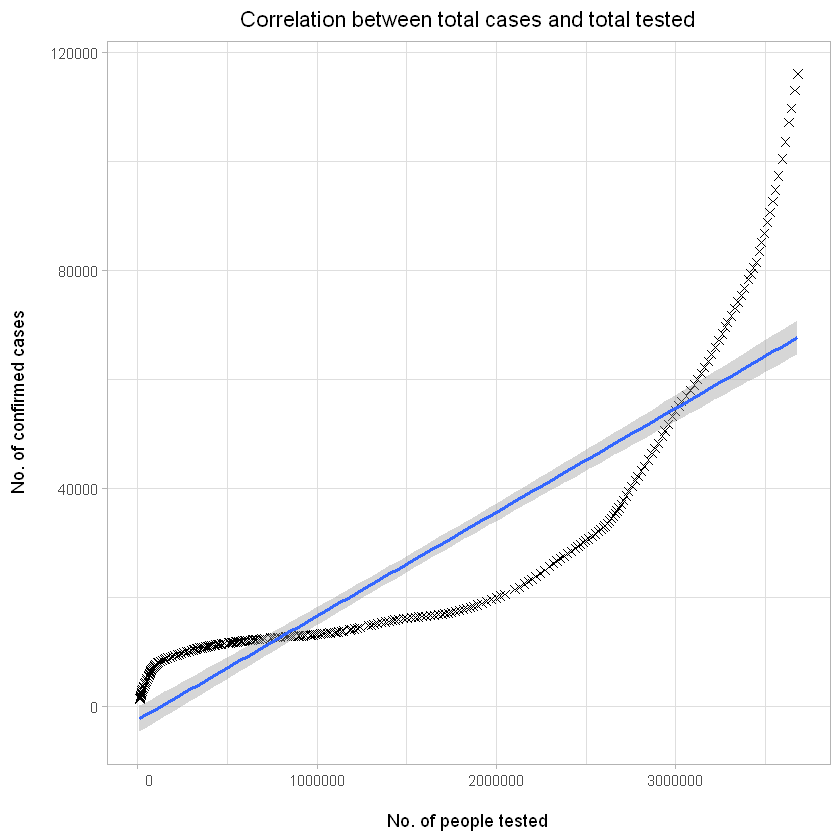

In [60]:
ggplot(denmark_covid_data, aes(x=total_tested, y=total_cases)) +
geom_point(size=2, shape=4) +
geom_smooth(method = "lm") +
scale_x_continuous("\nNo. of people tested",                            # Label for y-axis
                   labels = function(x) format(x, scientific = FALSE)   # Change from exponentials to human readable numbers
                   ) +
scale_y_continuous("No. of confirmed cases\n") +
ggtitle("Correlation between total cases and total tested") +                         # Title for the plot
single_plot_theme_config


# Calculating the Correlation Coefficient
cor.test(denmark_covid_data$total_cases,
         denmark_covid_data$total_tested, 
                    method = "pearson")


The scatter plot confirms that the relation between the 2 variables, confirmed cases and total people tested, has a positive, strong and non-linear relationship. The relationship is positive becuase of the nature of the linear line (blue in color) slanting upwards, from left to right. Since the plots do not follow the shape or form of the liner line, the relationship's form is non-linear. Finally, the variables have a strong relationship becuase they are follow a certain curve and are in compact alignment, meaning they are not scattered all over the chart.

Also, the output of Pearson Correlation Coefficient is `0.96` which illustrates the same conclusion as the scatter plot, which is calculcated just above the plot. Since `0.96` is greater than 0, the realtionship is positive and closer to the maximum possible output of 1, concluding the strong relationship.

## 5. Prediction

*This is a work in progress*

## 6. Conclusion of EDA
*This is a work in progress*

In [10]:
prettyNum(c(1000000, 20000),big.mark=",",scientific=FALSE)

[1] "1,000,000" "20,000"